# 2-1. 행렬과 벡터의 연산

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=2, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

### 행렬과 벡터 사용의 목적 
    
- 데이터를 벡터 또는 행렬 형태로 간단히 표현

- 데이터 간의 연산을 빠르고 간결하게 처리

### 학습 개요 

- 행렬과 벡터의 기본 정의와 연산
    
- 선형연립방정식과 행렬의 관계
  
- 벡터화 연산 코딩 실습
    
- 주요 참고 문헌 및 예제 : 공업수학Advanced Engineering Mathematics 10판<sup>[kreyszig]</sup>



## 행렬

- 사각 괄호로 둘러 쌓인 숫자들의 배열(Rectangular array of numbers written between square brackets)<sup>[andrew]</sup>

$$
\begin{bmatrix}
0.3 & 1 & -5 \\
0 & -0.2 & 16
\end{bmatrix}, \qquad
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} 
\end{bmatrix}
$$

- 각 숫자: 요소<sup>entries, elements</sup>, 가로줄: 행<sup>rows</sup>, 세로줄: 열<sup>columns</sup>

- 보기의 두번째 행렬, 행과 열수가 같은 행렬을 정사각행렬 또는 정방행렬<sup>square matrix</sup>이라 한다.





### 일반적 표현법

$$
\mathbf{A} = [a_{jk}] = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
$$

- 볼드 대분자로 표시

- 행렬의 크기는 [행크기]x[열크기] 로 표시

- 위 경우는 $m \times n$행렬

- 요소의 첫 번째 인덱스가 행 번호, 두 번째 인덱스가 열 번호

$$
\mathbf{A} =  \begin{bmatrix}
0.3 & 1 & -5 \\
0 & -0.2 & 16
\end{bmatrix}
$$

- 위 행렬에서 $a_{12}=1$

### 선형연립방정식의 표현

- 위에서 정의한 행렬을 이용하면 선형연립방정식을 행렬로만 표시 가능

$$
\begin{matrix}
7x_1 & + & 6x_2 & + & 9x_3 & = & 6  \\
6x_1 &   &      & - & 3x_3 & = & 25 \\
5x_1 & - & 8x_2 & + & x_3   & = & 10
\end{matrix}
$$

- 보기의 연립방정식은 미지수가 3개인 선형 연립방정식

- 계수만 따서 행렬로

$$
\mathbf{A} = \begin{bmatrix}
7 & 6 & 9   \\
6 & 0 & -3 \\
5 & -8 & 1
\end{bmatrix}
$$
 
- 우측 숫자를 하나의 열로 첨가하면 첨가행렬<sup>augmented matrix</sup>이 만들어 지는데 이는 선형 연립방정식의 모든 정보를 포함

$$
\tilde{\mathbf{A}} = \begin{bmatrix}
7 & 6 & 9 & 6  \\
6 & 0 & -3 & 25 \\
5 & -8 & 1 & 10
\end{bmatrix}
$$



## 벡터

- 행렬 관점에서 행이나 열을 하나만 가진 행렬을 벡터라 할 수 있음.

- 다시 말해 $n \times 1$ 행렬

- 행벡터 또는 열벡터라 하며 대부분 별도의 언급이 없으면 **벡터는 열벡터**

- 표시는 볼드 소문자

- 행렬과 벡터는 모두 의미 있는 숫자를 모아서 표현하기에 적합한 구조


$$
\mathbf{v} = \begin{bmatrix}  v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}
$$



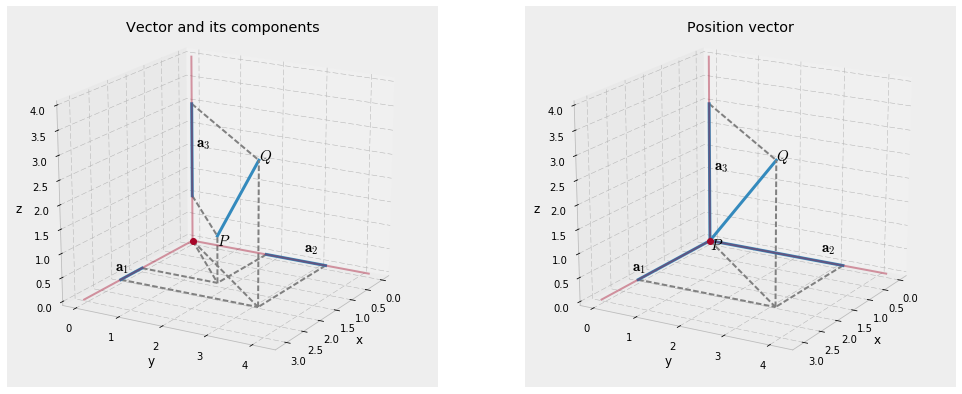

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.rcParams["figure.figsize"] = (17,7)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

x, y, z = 0, 1, 2
P = (1.5, 1.8, 1)

Q = (2.1, 3.2, 3)
O = (0, 0, 0)

def draw_vector(ax, P, Q, elev, azim, title=''):
    ax.plot3D([P[x], Q[x]], [P[y], Q[y]], [P[z], Q[z]], lw=3, color=style_colors[0])

    ax.plot3D([Q[x], Q[x]], [0, Q[y]], [0,0], '--', color="gray")
    ax.plot3D([P[x], P[x]], [0, P[y]], [0,0], '--', color="gray")

    ax.plot3D([0, Q[x]], [Q[y], Q[y]], [0,0], '--', color="gray")
    ax.plot3D([0, P[x]], [P[y], P[y]], [0,0], '--', color="gray")

    ax.plot3D([P[x], P[x]], [P[y], P[y]], [0, P[z]], '--', color="gray") #p로의 세로선
    ax.plot3D([Q[x], Q[x]], [Q[y], Q[y]], [0, Q[z]], '--', color="gray") #p로의 세로선

    ax.plot3D([0, P[x]], [0, P[y]], [0,0], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [0,0], '--', color="gray")

    ax.plot3D([0, P[x]], [0, P[y]], [P[z], P[z]], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [Q[z], Q[z]], '--', color="gray")

    ax.plot3D([P[x], Q[x]], [0, 0], [0,0], lw=3, color=style_colors[0])
    ax.plot3D([0,0], [P[y], Q[y]], [0,0], lw=3, color=style_colors[0])
    ax.plot3D([0,0], [0, 0], [P[z], Q[z]], lw=3, color=style_colors[0])

    ax.plot3D([O[x], 0], [O[y], 0], [O[z], Q[z]+1], color=style_colors[1], alpha=0.4)
    ax.plot3D([O[x], Q[x]+1], [0, 0], [0, 0], color=style_colors[1], alpha=0.4)
    ax.plot3D([0,0], [O[y], Q[y]+1], [0, 0], color=style_colors[1], alpha=0.4)

    ax.plot([O[x]], [O[y]], [O[z]], 'o', color=style_colors[1])

    ax.text(*Q, '$Q$', fontsize=15)
    ax.text(P[x], P[y], P[z]-0.2, '$P$', fontsize=15)
    ax.text(P[x]+(Q[x]-P[x])-0.3, -0.4, 0, '$\mathbf{a}_1$', fontsize=15)
    ax.text(-0.4, P[y]+(Q[y]-P[y])-0.8, 0, '$\mathbf{a}_2$', fontsize=15)
    ax.text(0, 0.1,  P[z]+(Q[y]-P[z])/2, '$\mathbf{a}_3$', fontsize=15)

    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.view_init(elev, azim)
    
draw_vector(ax1, P, Q, 20, 30, 'Vector and its components')  
draw_vector(ax2, O, Q, 20, 30, 'Position vector') 

plt.show()


- 3차원 공간의 두 점 $P(x_1, y_1, z_1)$, $Q(x_2, y_2, z_2)$가 있을 때

- 두 점 $P$, $Q$로 정의되는 벡터 $\mathbf{a} = \vec{PQ} = (a_1, a_2, a_3)^{\text{T}}$

- $\mathbf{a}$의 성분 : 시작점 $P$와 끝점 $Q$의 좌표차이 $a_1 = x_2 - x_1$, $a_2 = y_2 - y_1$, $a_3 = z_2 - z_1$ 

- 원점과 점 $Q$로 정의되는 벡터 : 위치벡터<sup>position vector</sup>

- 따라서 공간상의 점은 위치벡터

- 벡터의 길이 $\lvert \mathbf{a} \rvert = \sqrt{a_1^2 + a_2^2 + a_3^2}  $

- 벡터의 합 : 두 벡터의 요소간의 합 $\mathbf{a} + \mathbf{b} = [a_1+b_1, a_2+b_2, a_3+b_3]$



### 행렬과 벡터 요소의 인덱스

- 인덱스 : 행렬, 벡터의 요소를 지정하기 위해 아래첨자로 사용하는 숫자

- 0부터 시작하는 방식과 1부터 시작하는 방식이 있음

- 수학 : 1부터 시작

- 컴퓨터 공학 : 0부터 시작

$$
\mathbf{v}= \begin{bmatrix} 23 \\ 13 \\8 \\100 \end{bmatrix} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ v_4 \end{bmatrix} = \begin{bmatrix} v_0 \\ v_1 \\ v_2 \\ v_3 \end{bmatrix}
$$

- 프로그램 언어는 수학 계산용 언어는 주로 1부터 시작, 범용 언어는 0부터 시작

| 구분 | 언어 |
|------------|------------|
| 1부터 시작   | FORTRAN, Julia, MATLAB, Octave, ...  |
| 0부터 시작 | Python, C/C++, Java, Javascript, ... |

#### octave
```Octave
>> v = [10;11;12];
>> v(0)
error: v(0): subscripts must be either integers 1 to (2^31)-1 or logicals
>> v(1)
ans =  10
```

#### python
```python
In [1]: import numpy as np

In [2]: v = np.array([10, 11, 12])

In [3]: v[0]
Out[3]: 10

In [4]: v[1]
Out[4]: 11

In [5]:
```


### 벡터의 덧셈, 뺄셈

- 벡터의 덧셈, 뺄셈은 요소끼리 덧셈, 뺄셈

- 덧셈 : 두 벡터가 이루는 평행 사변형으로 계산

- 뺄셈 : $a-b = a+(-b)$로 두고 덧셈과 동일하게 계산

<img src="imgs/vec_plus_minus.png" width="700"/>

### 놈(노름)<sup>norm</sup>

- 벡터의 길이 $\lvert \mathbf{a} \rvert = \sqrt{a_1^2 + a_2^2 + a_3^2}  $에 대한 일반적인 정의

- 벡터 공간의 원소들에 일종의 '길이' 또는 '크기'를 부여하는 함수

$$
\lVert \mathbf{x} \rVert_{p} = \left( \sum_{i=1}^{n} \lvert x_i \rvert^{p} \right)^{1/p}
$$

- 두점 (0,0), (6,6)대한 

- $p=1$, L1 놈,맨해튼 거리  : 요소의 절대값을 더함, |6|+|6|=12

- $p=2$, L2 놈, 유클리드 놈 : 요소의 제곱을 더해서 루트 씌움, 두점 사이의 거리 $\sqrt{6^2 + 6^2}=8.48...$


<img  align="center" src="imgs/Manhattan_distance.svg">
<h5 align="center">https://en.wiktionary.org/wiki/Manhattan_distance : Public domain</h5>




## 행렬, 벡터의 연산

### 행렬과 벡터의 덧셈과 스칼라 곱셈

#### 행렬의 동치

- 두 행렬 $\mathbf{A}$, $\mathbf{B}$의 크기가 같고 같은 위치의 요소가 모두 같으면 두 행렬은 서로 같음.

$$
\mathbf{A} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{bmatrix} \quad 
\mathbf{B} = \begin{bmatrix} 5 & 1 \\ 3 & -2 \end{bmatrix}
$$

- 위 두 행렬에서 $a_{11}=5$, $a_{12}=1$, $a_{21}=3$, $a_{22}=-2$면 두 행렬은 같음.

#### 행렬의 덧셈과 스칼라곱

- 두 행렬의 크기가 같을 때 $\mathbf{A} + \mathbf{B}$는 같은 위치 요소의 덧셈을 의미

$$
\mathbf{A} = \begin{bmatrix} 3 & 1 \\ 10 &  12\end{bmatrix} \quad 
\mathbf{B} = \begin{bmatrix} 5 & 1 \\ 3 & -2 \end{bmatrix}
$$

$$
\mathbf{A} +  \mathbf{B} = \begin{bmatrix} 8 & 2 \\ 13 &  10\end{bmatrix}
$$


- 따라서 크기가 다른 행렬은 덧셈 불가능

- 행렬에 대한 스칼라 곱은 각 요소에 스칼라를 곱하는 것

- 예

$$
\begin{bmatrix} 8 & 2 \\ 16 &  10\end{bmatrix} \times \frac{1}{2} + 3 \times \begin{bmatrix} 1 & 1 \\ 3 &  4\end{bmatrix} = \begin{bmatrix} 4 & 1 \\ 8 &  5\end{bmatrix} + \begin{bmatrix} 3 & 3 \\ 9 &  12\end{bmatrix} = \begin{bmatrix} 7 & 4 \\ 17 &  17\end{bmatrix}
$$

In [3]:
A = np.asarray([8,2,16,10]).reshape(2,2)
B = np.asarray([1,1,3,4]).reshape(2,2)

print(A*(1/2) + 3*B)

[[ 7.  4.]
 [17. 17.]]


- 일반적인 성질

$$
\begin{align}
\mathbf{A} + \mathbf{B} &= \mathbf{B} + \mathbf{A} \\[5pt]
(\mathbf{A} + \mathbf{B})+ \mathbf{C} &= \mathbf{A} + (\mathbf{B}+ \mathbf{C}) \\[5pt]
\mathbf{A} + \mathbf{0} &= \mathbf{A} \\[5pt]
\mathbf{A} + (-\mathbf{A}) & = \mathbf{0} \\[5pt]
c(\mathbf{A} + \mathbf{B}) &= c\mathbf{A} + c\mathbf{B} \\[5pt]
(c+k)\mathbf{A} &= c\mathbf{A} + k\mathbf{A} \\[5pt]
c(k\mathbf{A}) &= (ck)\mathbf{A} \\[5pt]
1\mathbf{A} &= \mathbf{A}
\end{align}
$$

#### 단위벡터

- 크기가 1인 벡터

- Normailize : 벡터를 벡터의 크기로 나눔

$$
\hat{\mathbf{u}} = \frac{\mathbf{u}}{\lvert \mathbf{u} \rvert}
$$


<table border="0">
<tr>
<td>
<img src="imgs/unit_vector1.png"/>
</td>
<td>
<img src="imgs/unit_vector2.png"/>
</td>
</tr>
<tr>
<td colspan="2">https://en.wikipedia.org/wiki/Unit_vector : CC BY-SA 4.0</td>
</tr>
</table>



### 행렬의 곱셈
- $m \times n$행렬 $\mathbf{A}$와 $r \times p$행렬 $\mathbf{B}$의 곱 $\mathbf{C} = \mathbf{AB}$는 $r=n$일 때 다음과 같이
$m \times p$행렬에 의해 정의

<img src="imgs/matrix-product2.png" width="550" />

$$
c_{jk} = \sum_{l=1}^{n} a_{jl}b_{lk} = a_{j1}b_{1k} + a_{j2}b_{2k} + \cdots + a_{jn}b_{nk} \\
j = 1, \cdots, m \\
k = 1, \cdots, p 
$$

$$
\begin{matrix}
\mathbf{A} & \mathbf{B} & = & \mathbf{C} \\
[m \times n] & [n \times p] && [m \times p]
\end{matrix}
$$

- 위처럼 서로 인접한 인덱스가 항상 같아야 곱셈이 성립

<img src="imgs/matrix-product.png" width="450" />

- 따라서 $\mathbf{BA}$는 정의되지 않고 일반적으로 $\mathbf{AB} \neq \mathbf{BA}$

$$
\begin{bmatrix} 1 & 2 \\ 23 & 43 \\ 56 & 32 \\ 41 & 55 \end{bmatrix} \begin{bmatrix} 11 & 12 & 13 \\21 & 22 & 23 \end{bmatrix} = \begin{bmatrix} 1\cdot11 + 2\cdot21 & 1\cdot12+2\cdot22 &  1\cdot13+2\cdot23 \\ 
23\cdot11 + 43\cdot21 & 23\cdot12+43\cdot22 &  23\cdot13+43\cdot23 \\
56\cdot11 + 32\cdot21 & 56\cdot12+32\cdot22 &  56\cdot13+32\cdot23 \\
41\cdot11 + 55\cdot21 & 41\cdot12+55\cdot22 &  41\cdot13+55\cdot23
\end{bmatrix}
$$

- 다음은 정의되지 않음

$$
\begin{bmatrix} 11 & 12 & 13 \\21 & 22 & 23 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 23 & 43 \\ 56 & 32 \\ 41 & 55 \end{bmatrix} 
$$

#### Numpy array multiplication is not matrix multiplication<sup>[scipy-lecture]</sup>

- numpy ndarray간의 곱은 요소간의 직접적인 곱이며 행렬곱이 아님

- 행렬곱을 하려면 `numpy.dot() ` 또는 ` numpy.matrix ` 객체를 이용해야함

- 주로 ` numpy.dot()` 이용

In [4]:
c = np.ones((3, 3))
C = np.matrix(c)

print("numpy array multiplication")
print(c*c)
print("\n")

print("numpy dot function")
print(c.dot(c))
print("\n")

print("numpy matrix multiplication")
print(C*C)

numpy array multiplication
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


numpy dot function
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


numpy matrix multiplication
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


```python
A = np.asarray([1, 2, 23, 43, 56, 32, 41, 55]).reshape(4,2)
B = np.asarray([11, 12, 13, 21, 22, 23]).reshape(2,3)
C = np.dot(A,B)
print(C)

# 정의되지 않는다.
C = np.dot(B,A)

[[  53   56   59]
 [1156 1222 1288]
 [1288 1376 1464]
 [1606 1702 1798]]

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-5-143337631864> in <module>()
      5 
      6 # 정의되지 않는다.
----> 7 C = np.dot(B,A)

ValueError: shapes (2,3) and (4,2) not aligned: 3 (dim 1) != 4 (dim 0)


```

#### 행렬과 벡터의 곱

$$
\begin{bmatrix} 2 & 2 \\ 3 & 8 \\ 1 & 1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 3 \\ 5 \end{bmatrix} = 
\begin{bmatrix} 2 \cdot 3 + 2 \cdot 5 \\ 3 \cdot 3 + 8 \cdot 5 \\ 1\cdot3 + 1\cdot5 \\ 0\cdot3 + 1\cdot5\end{bmatrix} = \begin{bmatrix} 16 \\ 49 \\8 \\ 5\end{bmatrix}
$$

- 위 행렬과 벡터의 곱은 왼쪽 행렬의 첫번째 열 $[2 \, 3 \, 1 \, 0]^{\text{T}}$을 3배, 두번째 열 $[2 \, 8 \, 1 \, 1]^{\text{T}}$을 5배하여 서로 더한 결과

- 따라서 행렬곱의 결과를 왼쪽 행렬의 열을 오른쪽 행렬의 열에 있는 숫자 만큼 배수를 취하여 서로 섞은(더한) 벡터라고 볼 수 있음.

- 다음은 정의되지 않음

$$
\begin{bmatrix} 3 \\ 15 \end{bmatrix} \begin{bmatrix}4 & 2 \\ 1 & 8 \end{bmatrix} 
$$

- 행렬과 벡터의 곱을 위와 같이 앞 행렬의 열에 혼합으로 생각한다면 행렬과 행렬의 곱을 다음처럼 생각해 볼 수 도 있다.

$$
\begin{align}
\mathbf{A}\mathbf{B} &= \mathbf{A} \begin{bmatrix} \color{RoyalBlue}{\mathbf{b}_1} & \color{OrangeRed}{\mathbf{b}_2} & \color{Goldenrod}{\mathbf{b}_3} \end{bmatrix} \\[5pt]
&= \begin{bmatrix} 1 & 2 \\ 23 & 43 \\ 56 & 32 \\ 41 & 55 \end{bmatrix} \begin{bmatrix} \color{RoyalBlue}{11} & \color{OrangeRed}{12} & \color{Goldenrod}{13} \\ \color{RoyalBlue}{21} & \color{OrangeRed}{22} & \color{Goldenrod}{23} \end{bmatrix} = \begin{bmatrix} 1 \cdot \color{RoyalBlue}{11} + 2 \cdot \color{RoyalBlue}{21} & 1 \cdot \color{OrangeRed}{12}+2 \cdot \color{OrangeRed}{22} &  1\cdot \color{Goldenrod}{13} + 2\cdot \color{Goldenrod}{23}  \\ 
23 \cdot \color{RoyalBlue}{11} + 43\cdot\color{RoyalBlue}{21} & 23\cdot\color{OrangeRed}{12}+43 \cdot \color{OrangeRed}{22} &  23\cdot \color{Goldenrod}{13} + 43\cdot \color{Goldenrod}{23}  \\
56 \cdot \color{RoyalBlue}{11} + 32\cdot\color{RoyalBlue}{21} & 56\cdot \color{OrangeRed}{12} +32 \cdot \color{OrangeRed}{22} &  56\cdot \color{Goldenrod}{13} + 32\cdot \color{Goldenrod}{23}  \\
41 \cdot \color{RoyalBlue}{11} + 55\cdot\color{RoyalBlue}{21} & 41\cdot \color{OrangeRed}{12} +55 \cdot \color{OrangeRed}{22} &  41\cdot \color{Goldenrod}{13} + 55\cdot \color{Goldenrod}{23} 
\end{bmatrix} \\[5pt]
&= \begin{bmatrix} \mathbf{A}\color{RoyalBlue}{\mathbf{b}_1} & \mathbf{A}\color{OrangeRed}{\mathbf{b}_2} & \mathbf{A}\color{Goldenrod}{\mathbf{b}_3} \end{bmatrix}
\end{align}
$$


In [12]:
A = np.asarray([2, 2, 3, 8, 1, 1, 0, 1]).reshape(4,2)
b = np.asarray([3,5]).reshape(2,1)
C = np.dot(A,b)

print(C)

# 각 열에 뒤에서 곱하는 벡터의 요소배 하여 더한 것과도 결과가 같다.
print(A[:,0]*b[0] + A[:,1]*b[1])
print( (A*b.reshape(-1)).sum(axis=1) )

[[16]
 [49]
 [ 8]
 [ 5]]
[16 49  8  5]
[16 49  8  5]


#### 행벡터와 열벡터의 곱

- 행벡터와 열벡터의 곱

- 이런 연산을 벡터의 내적 이라고 도 함


$$
\begin{bmatrix} 3 & 6 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix} = [19]
$$

#### 내적<sup>inner product, dot product</sup> 

- 두 벡터의 내적 또는 점적은 두 벡터의 사이각의 코사인값과 두 벡터의 크기의 곱으로 정의

$$
\begin{align}
\mathbf{a} \cdot \mathbf{b} &= \lvert \mathbf{a} \rvert \lvert \mathbf{b} \rvert \cos \gamma
\end{align}
$$

<img src="imgs/innerprod.png" width="600"/>



#### 내적의 성질

$$
\begin{align}
(q_1 \mathbf{a} + q_2 \mathbf{b}) \cdot \mathbf{c} = q_1 \mathbf{a} \cdot \mathbf{c} + q_2 \mathbf{b} \cdot \mathbf{c} \quad &\text{Linearity} \\[5pt]
\mathbf{a} \cdot \mathbf{b} =  \mathbf{b} \cdot \mathbf{a} \quad &\text{Symmetry}\\[5pt]
(\mathbf{a}+\mathbf{b}) \cdot \mathbf{c}= \mathbf{a}\cdot\mathbf{c} + \mathbf{b}\cdot\mathbf{c}  \quad  &\text{Distributivity} 
\end{align}
$$

#### 벡터의 단위 기저벡터 형식 표현<sup>$\dagger$</sup>

- $\mathbf{i}$, $\mathbf{j}$, $\mathbf{k}$ : 카르테시안 좌표계<sup>Cartesian coordinate system</sup>에서 각 축의 양의 방향으로 향하는 단위벡터

<img src="imgs/certesian-unit.png" width="350"/>

$$
\mathbf{a}  = a_1 \mathbf{i} + a_2 \mathbf{j} + a_3 \mathbf{k} \\[5pt]
\mathbf{b}  = b_1 \mathbf{i} + b_2 \mathbf{j} + b_3 \mathbf{k} 
$$

- 기저벡터 형식으로 쓰고 내적의 분배법칙을 적용하면

$$
\begin{align}
\mathbf{a} \cdot \mathbf{b} 
&= (a_1 \mathbf{i} + a_2 \mathbf{j} + a_3 \mathbf{k}) \cdot ( b_1 \mathbf{i} + b_2 \mathbf{j} + b_3 \mathbf{k}) \\[5pt]
&= \quad a_1 b_1 \mathbf{i} \cdot \mathbf{i} + a_2 b_1 \mathbf{j} \cdot \mathbf{i} + a_3 b_1 \mathbf{k} \cdot \mathbf{i} \\[5pt]
&+ \quad a_1 b_2 \mathbf{i} \cdot \mathbf{j} + a_2 b_2 \mathbf{j} \cdot \mathbf{j} + a_3 b_2 \mathbf{k} \cdot \mathbf{j} \\[5pt]
&+ \quad a_1 b_3 \mathbf{i} \cdot \mathbf{k} + a_2 b_3 \mathbf{j} \cdot \mathbf{k} + a_3 b_3 \mathbf{k} \cdot \mathbf{k} 
\end{align}
$$

- 여기서 $\mathbf{i} \cdot \mathbf{i} = \lvert \mathbf{i} \rvert^2 = 1$이고 $\mathbf{j}$, $\mathbf{k}$에 대해서도 마찬가지

- 또한 $\mathbf{i} \cdot \mathbf{j}$등 서로 다른 단위벡터의 내적은 0

- 따라서 

$$
\mathbf{a} \cdot \mathbf{b} = a_1 b_1 + a_2 b_2 + a_3 b_3 \qquad \mathbf{a} = (a_1, a_2, a_3), \mathbf{b} = (b_1, b_2, b_3)
$$



#### 행렬곱의 일반적인 성질

$$
\begin{align}
(k\mathbf{A})\mathbf{B} &= k(\mathbf{AB}) \\[5pt]
\mathbf{A}(\mathbf{B}\mathbf{C}) &= (\mathbf{A}\mathbf{B})\mathbf{C} \\[5pt]
(\mathbf{A} + \mathbf{B})\mathbf{C} &= \mathbf{A}\mathbf{C}+\mathbf{B}\mathbf{C} \\[5pt]
\mathbf{C}(\mathbf{A} + \mathbf{B}) &= \mathbf{C}\mathbf{A}+\mathbf{C}\mathbf{B} 
\end{align}
$$

- **교환법칙은 성립하지 않음**

#### 행렬곱 연산의 인덱스 표현, 아인슈타인 표기법<sup>Einstein summation convention</sup>

- $\mathbf{c} =  \mathbf{Ab}$, $\mathbf{C} =  \mathbf{AB}$ 일때 

$$
\mathbf{c}_{i} = \sum_j \mathbf{A}_{ij}\mathbf{b}_{j}, \qquad \mathbf{c}_{i} = \mathbf{A}_{ij}\mathbf{b}_{j} \quad \text{i : free index} \quad \text{j : dummy index}
$$

$$
\mathbf{C}_{ij} = \sum_k \mathbf{A}_{ik}\mathbf{B}_{kj}, \qquad \mathbf{C}_{ij} = \mathbf{A}_{ik}\mathbf{B}_{kj} \quad \text{i,j : free index} \quad \text{k : dummy index}
$$

- 더미인덱스는 어떤 인덱스로 바꿔도 상관없음. 중요한것은 프리인덱스

#### 선형변환 관점에서 본 행렬 곱셈의 유래<sup>$\dagger$</sup>

$$
y_1 = a_{11} x_1 + a_{12}x_2 \\
y_2 = a_{21} x_1 + a_{22}x_2
$$

- 위 식은 어떤 $(x_1, x_2)$ 벡터를 적당히 곱하고 더하고 해서 $(y_1, y_2)$로 변환 시키는 과정

- 또는 $(y_1, y_2)$가 정해져 있다면 2원 1차 연립방정식이라고 볼 수 있다.

- 위 연립방정식을 숫자만으로 나타낼 수 없을까?

- 앞서 "선형연립방정식의 표현" 이미 이야기한것과 같이 다음처럼 계수 행렬을 만들면

$$ 
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}
$$

- 이 계수행렬로 부터 다시 연립방정식의 우변항을 만들어 낼려면 변수벡터를 행렬곱 형식으로 곱하면 된다.

- 일단 행렬곱 형식을 인정하고 이를 행렬-벡터형태로 써보면

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \mathbf{Ax} = 
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 
\begin{bmatrix} a_{11}x_1+a_{12}x_2 \\ a_{21}x_1+a_{22}x_2 \end{bmatrix} \tag{1}
$$

- $\mathbf{x}$가 $\mathbf{w}$로 부터 다시 변환된다고 하면

$$
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \mathbf{Bw} = 
\begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix}
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = 
\begin{bmatrix} b_{11}w_1+b_{12}w_2 \\ b_{21}w_1+b_{22}w_2 \end{bmatrix} \tag{2}
$$

- 즉 다음처럼 순차적으로 선형변환이 일어난다.

$$
\mathbf{w} \to \mathbf{x} \to \mathbf{y}
$$

- $\mathbf{w}$에서 $\mathbf{y}$로의 변환을 생각해보면

$$
\mathbf{y} = \mathbf{Cw} = \begin{bmatrix} c_{11} & c_{12} \\ c_{21} & c_{22} \end{bmatrix}
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}=
\begin{bmatrix} c_{11}w_1+c_{12}w_2 \\ c_{21}w_1+c_{22}w_2 \end{bmatrix}
$$

- 로 어떤 계수행렬 $\mathbf{C}$가 있을 수 있다.

$$
\begin{align}
\mathbf{y} &= \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \mathbf{Ax} \\[5pt]
&=\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}
\begin{bmatrix} b_{11}w_1+b_{12}w_2 \\ b_{21}w_1+b_{22}w_2 \end{bmatrix} \qquad \because (2) \\[5pt]
&= \begin{bmatrix} a_{11}(b_{11}w_1 + b_{12}w_2) + a_{12}(b_{21}w_1 + b_{22}w_2) \\ 
a_{21}(b_{11}w_1 + b_{12}w_2) + a_{22}(b_{21}w_1 + b_{22}w_2) \end{bmatrix} \\[5pt]
&= \begin{bmatrix} (a_{11}b_{11} + a_{12}b_{21})w_1 + (a_{11}b_{12}+a_{12}b_{22})w_2 \\
(a_{21}b_{11} + a_{22}b_{21})w_1 + (a_{21}b_{12} + a_{22}b_{22})w_2
\end{bmatrix} \\[5pt]
&= \begin{bmatrix} (a_{11}b_{11} + a_{12}b_{21}) & (a_{11}b_{12}+a_{12}b_{22}) \\
(a_{21}b_{11} + a_{22}b_{21}) & (a_{21}b_{12} + a_{22}b_{22})
\end{bmatrix}
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix} \\[5pt]
&= \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix}\begin{bmatrix} w_1 \\ w_2 \end{bmatrix} \\[5pt]
&= \mathbf{AB} \mathbf{w} = \mathbf{C}\mathbf{w}
\end{align}
$$

- 두 변환을 한꺼번에 수행하는 변환은 각 변환의 행렬곱으로 표현된다.



### 행렬의 전치<sup>transpose</sup>

- 주어진 행렬의 행을 열로, 열을 행으로 이동

- $\mathbf{A}^{\text{T}}$로 표시

$$
\mathbf{A} = \begin{bmatrix} 5 & -8 & 1 \\ 4 & 0 & 3 \end{bmatrix}
$$

$$
\mathbf{A}^{\text{T}} =  \begin{bmatrix} 5 & 4 \\ -8 & 0 \\ 1 & 3 \end{bmatrix}
$$

$$
\begin{align}
\left(\mathbf{A}^{\text{T}}\right)^{\text{T}} &= \mathbf{A} \\[5pt]
\left(\mathbf{A}+\mathbf{B}\right)^{\text{T}} &= \mathbf{A}^{\text{T}} + \mathbf{B}^{\text{T}} \\[5pt]
\left(c\mathbf{A}\right)^{\text{T}} &= c \mathbf{A}^{\text{T}} \\[5pt]
\left( \mathbf{A} \mathbf{B} \right)^{\text{T}} &= \mathbf{B}^{\text{T}} \mathbf{A}^{\text{T}}
\end{align}
$$

In [6]:
A = np.asarray([5, -8, 1, 4, 0, 3]).reshape(2,3)
print(A.T)

B = np.asarray([3, 1, 0, 1, 2, 8]).reshape(3,2)
print(np.dot(A,B).T)

print(np.dot(B.T, A.T))

[[ 5  4]
 [-8  0]
 [ 1  3]]
[[17 18]
 [ 5 28]]
[[17 18]
 [ 5 28]]


### 행렬의 대각합<sup>trace</sup>

$$
\text{tr}(\mathbf{A}) = \sum_{i=1}^{n} a_{ii} = a_{11} + a_{22} + \cdots + a_{nn}
$$

- 성질

$$
\text{tr}(\mathbf{A} + \mathbf{B}) = \text{tr}(\mathbf{A}) + \text{tr}(\mathbf{b})
$$

$$
\text{tr}(c\mathbf{A})  = c\,\text{tr}(\mathbf{A})
$$

$$
\text{tr}(\mathbf{A}) = \text{tr}\left(\mathbf{A}^{\text{T}} \right)
$$

$$
\text{tr}(\mathbf{AB}) = \text{tr}(\mathbf{BA})
$$

### 특별한 행렬들

#### 단위행렬<sup>unit, identity matrix</sup>

- 대각 성분이 모두 1인 $n \times n$ 정사각 행렬, $\mathbf{I}_{n}$, $\mathbf{I}$

- $\mathbf{AI} = \mathbf{IA} = \mathbf{A}$ 


$$
\mathbf{I} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}
$$

#### 대각행렬<sup>diagonal matrix</sup>

- 대각선상에서만 0이 아닌 성분을 가진 $n \times n$  정사각 행렬

$$
\mathbf{D} = \begin{bmatrix} 2 & 0 & 0 \\ 0 & -3 & 0 \\ 0 & 0 & 0 \end{bmatrix}
$$



#### 대칭행렬<sup>symmetric matrix</sup>

- 정사각행렬에 대해서 $ \mathbf{S}^{\text{T}} = \mathbf{S} $, 따라서 $s_{kj} = s_{jk}$인 행렬

$$
\mathbf{S} = \begin{bmatrix}
10 & 20 & 100 \\ 20 & 10 & 120 \\ 100 & 120 & 20
\end{bmatrix}
$$



### 역행렬

- $n \times n$행렬 $\mathbf{A}$의 역행렬은 $\mathbf{A}^{-1}$로 표시하며 다음을 만족시킨다.
$$
\mathbf{AA}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}
$$

- 역행렬을 가지면 $\mathbf{A}$는 정칙행렬<sup>nonsingular matrix</sup>, 역행렬이 없으면 특이행렬<sup>singular matrix</sup>

- 대부분의 언어에는 역행렬을 구하는 선형대수 라이브러리가 준비되어 있다. ```python numpy.linalg.inv() ```


#### 역행렬을 이용한 선형 연립방정식의 해

$$
\begin{align}
\mathbf{A}\mathbf{x} &= \mathbf{b} \\[5pt]
\mathbf{A}^{-1} \mathbf{A} \mathbf{x} &= \mathbf{A}^{-1} \mathbf{b} \\[5pt]
 \mathbf{x} &= \mathbf{A}^{-1} \mathbf{b}
\end{align}
$$

$$
\begin{matrix}
2x_1  & + & 1x_2 & = & 3 \\
-6x_1 & + & 3x_2 & = & -27
\end{matrix}  \Rightarrow
\begin{bmatrix}
2 & 1  \\
-6 & 3
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}=
\begin{bmatrix}
3\\ -27
\end{bmatrix}
$$

$$
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}=
\begin{bmatrix}
2 & 1  \\
-6 & 3
\end{bmatrix}^{-1}
\begin{bmatrix}
3\\ -27
\end{bmatrix}
$$

In [7]:
A = np.array([[2,1],[-6, 3]])
b = np.array([3, -27])

np.dot(np.linalg.inv(A), b)

array([ 3., -3.])

### 행렬 왜 배우지?

- 기온에 따른 아이스크림 판매량

|온도|20|21|22|23|24|25|26|
|----|--|--|--|--|--|--|--|
|판매량|15|16|21|33|42|60|64|

- 현재 6월 30일, 오늘까지 주문하면 아이스크림 원가가 반값

- 7월, 8월 판매할 아이스크림을 오늘 12시 전에 주문해야 한다.


[   9.14 -174.43]


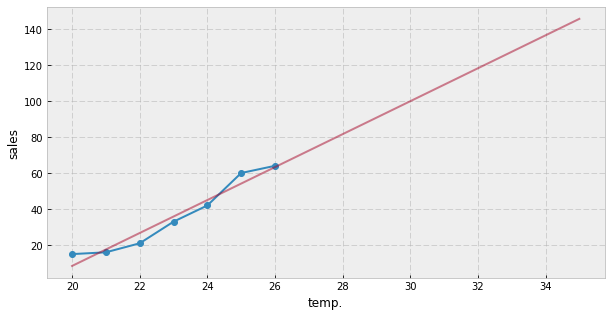

In [8]:
plt.rcParams["figure.figsize"] = (10,5)

t = np.array([20, 21, 22, 23, 24, 25, 26]) 
c = np.array([15, 16, 21, 33, 42, 60, 64])
p = np.polyfit(t, c, 1)

ts = np.linspace(20, 35, 100)
print(p)
plt.plot(t, c, 'o-')
plt.plot(ts, p[0]*ts+p[1], alpha=0.5)
plt.xlabel('temp.')
plt.ylabel('sales')
plt.show()

- 회귀식과 7월, 8월 일별 온도를 이용해서 모든 날짜의 구매 수량을 예측한다.

- 7월, 8월 일별 온도는 기상청 웹사이트에서 긁어온다.

- for 루프 방식과 행렬-벡터 곱셈을 이용하여 결과 비교

- 결과는 동일하고 데이터의 양이 훨씬 많다면 행렬곱 형태의 효율이 압도적으로 좋다.

In [9]:
t_78 = np.array([30.5,31.1,34.3,32.1,33.1,32.8,29.2,29.7,35.4,32.6,34,35.9,37.2,35.9,30.9,34.5,
33,32,35.2,35.6,36.6,38.4,31.9,35.9,27.9,30.1,33.9,35.4,26.2,30.9,26.1,32.8,
31.3,32.1,35.6,36.5,37,35.5,34.5,29.7,26.2,32.3,30.2,26.7,24.2,25.2,30.4,30.3,
31.1,30.2,29.3,32,33.5,35.9,35.5,33.7,31.4,31,32.3,30.9,25.6,29.1]).reshape(-1,1)


# for loop
pred = []
for tt in t_78 :
    pred.append(p[0]*tt + p[1])
    
print(np.asarray(pred).sum())

# matrix, vector product
T = np.c_[np.ones(t_78.shape[0]), t_78]
print(np.dot(T,p[::-1].reshape(-1,1)).sum())


7382.457142857143
7382.457142857143


### 행렬과 벡터의 연산 구현

- 실제 행렬과 벡터의 연산을 코딩하는 방법은 아래 두가지 형태가 있다.

    - #### for loop 연산 : 직관적이면서 구현이 쉬움 
    - #### 벡터화<sup>vectorization</sup> 연산 : 덜 직관적이지만 효율적


- 가능하면 벡터화 연산을 사용하는 것이 좋지만 익숙해지는데 시간이 걸리고 그때그때 햇갈리기도 함

- 행렬-벡터 과정 마지막 내용으로 몇가지 예제에 대해 코드를 만들어 봄

### 예제 1. $$
y_i = \sum_{j} A_{ij} x_j \quad y_i = \sum_{j} A_{ji} x_j
$$


In [10]:
A = np.random.randint(1, 10, 25).reshape(5,5)
x = np.random.randint(1, 10, 5).reshape(-1,1)

print('A')
print(A)
print('x')
print(x)
print("\n")

print("######################")
print("y_i = sum_j A_ij * x_j ")
print("######################")
########################################
# for loop 방식
y = []
temp = 0; m = A.shape[0];
for i in range(m) :
    for j in range(A.shape[1]) :
        temp += A[i,j]*x[j]
    y.append(temp)
    temp = 0

print("for loop 방식")
y = np.array(y)
print(y)
print("\n")

print("벡터화 방식")
y = A.dot(x)
print(y)

print("\n")

print("######################")
print("y_i = sum_j A_ji * x_j ")
print("######################")
########################################
# for loop 방식
y = []
temp = 0; m = A.shape[0];
for i in range(m) :
    for j in range(A.shape[1]) :
        temp += A[j,i]*x[j]
    y.append(temp)
    temp = 0

print("for loop 방식")
y = np.array(y)
print(y)
print("\n")

print("벡터화 방식")
y = A.T.dot(x)
print(y)


A
[[9 9 5 1 9]
 [6 8 2 9 6]
 [8 5 4 5 2]
 [4 7 2 1 2]
 [6 3 1 5 2]]
x
[[7]
 [5]
 [9]
 [6]
 [5]]


######################
y_i = sum_j A_ij * x_j 
######################
for loop 방식
[[204]
 [184]
 [157]
 [ 97]
 [106]]


벡터화 방식
[[204]
 [184]
 [157]
 [ 97]
 [106]]


######################
y_i = sum_j A_ji * x_j 
######################
for loop 방식
[[219]
 [205]
 [ 98]
 [128]
 [133]]


벡터화 방식
[[219]
 [205]
 [ 98]
 [128]
 [133]]


### 예제 2. $$
\mathbf{S} = \sum_{i=1}^{m} \mathbf{x}^{(i)} \left(\mathbf{x}^{(i)} \right)^{\text{T}}
$$

- 벡터에 쓰는 윗첨자는 주로 여러개의 벡터가 있을 때 $i$번째 벡터를 나타내는 경우가 많음

- 지수와 구별하기 위해 $(i)$로 표시

- #### for 루프 방식

```python
X = [x1, x2, x3, x4, x5]

S = np.zeros((x1.shape[0], x1.shape[0]), dtype=int)
for i in range(len(X)):
    x_i = X[i]
    S += np.dot(x_i, x_i.T)
print(S)   
[[335 370 405]
 [370 410 450]
 [405 450 495]]
```

- #### 행렬-벡터 방식

```python
X = np.array([x1, x2, x3, x4, x5]).reshape(5,3)    # row major
S = np.dot(X.T, X)
print(S)
[[335 370 405]
 [370 410 450]
 [405 450 495]]
```


In [11]:
# 열벡터 5개 정의
x1 = np.array([1,2,3])[:,np.newaxis]
x2 = np.array([4,5,6])[:,np.newaxis]
x3 = np.array([7,8,9])[:,np.newaxis]
x4 = np.array([10,11,12])[:,np.newaxis]
x5 = np.array([13,14,15])[:,np.newaxis]

########################################
# for loop 방식
print("for loop 방식")
X = [x1, x2, x3, x4, x5]
m = len(X)
S = np.zeros((x1.shape[0], x1.shape[0]), dtype=int)

for i in range(m):
    x_i = X[i]
    S += np.dot(x_i, x_i.T)
print(S)
print('\n')

########################################
# 벡터화 방식
print("벡터화 방식 : Numpy와 벡터 내적 이용")
X = np.array([x1, x2, x3, x4, x5]).reshape(5,3)    # row major
S = np.dot(X.T, X)
print(S)

for loop 방식
[[335 370 405]
 [370 410 450]
 [405 450 495]]


벡터화 방식 : Numpy와 벡터 내적 이용
[[335 370 405]
 [370 410 450]
 [405 450 495]]


### 예제 3. $$
w^{(t+1)}_j = \sum_{i=1}^{m} \left\{ \left(\mathbf{X}_{(i,:)}\cdot\mathbf{w}^{(t)}-y_i\right) X_{ij}\right\}
$$

- 위 식은 선형회귀에서 회귀 계수를 업데이트하는 식

- $\mathbf{X}_{(i,:)}$ : 행렬 $\mathbf{X}$의 $i$번째 행을 나타냄

- 윗첨자 $(t)$, $(t+1)$ : 반복적인 업데이트 과정에서  $(t)$번째와 $(t+1)$번째를 나타냄

- 즉 위 식은 $(t)$번째 $\mathbf{w}$를 $(t+1)$번째 $\mathbf{w}$로 업데이트하는 식

- 아래와 같은 데이터 상태에서 위 식으로 업데이트를 하면......


$$
\mathbf{X} = \begin{bmatrix}
2.74 & 3.58 \\
3.01 & 2.72 \\
2.12 & 3.23 \\
2.19 & 4.46 \\
4.82 & 1.92 \\
3.96 & 2.64 \\
2.84 & 4.63 \\
0.36 & 0.44 \\
0.1  & 4.16 \\
3.89 & 4.35
\end{bmatrix} \qquad \mathbf{w} = \begin{bmatrix} 1.2 \\ 3.4 \end{bmatrix} \qquad
\mathbf{y} = \begin{bmatrix}
0.98\\
0.8\\
0.46\\
0.78\\
0.12\\
0.64\\
0.14\\
0.94\\
0.52\\
0.41
\end{bmatrix}
$$



- #### for 루프 방식

```python
w2 = np.zeros_like(w)
m = X.shape[0]

for j in range(w.shape[0]):
    for i in range(m):
        w2[j] += (np.dot(X[i,:],w) - y[i])*X[i,j]
        
print(w2)   
[[381.35]
 [489.13]]
```

- #### 행렬-벡터 방식

```python
print(np.dot(X.T, (np.dot(X,w)-y)))
[[381.35]
 [489.13]]
```

In [12]:
np.random.seed(0)

X = (np.random.rand(20)*5).reshape(-1,2)
# print(X)

w = np.array([1.2, 3.4]).reshape(-1,1)
# print(w)

y = np.random.rand(10).reshape(-1,1)
# print(y)

########################################
# for loop 방식
print("for loop 연산")
def for_loop():
    w2 = np.zeros_like(w)
    m = X.shape[0]
    for j in range(w.shape[0]):
        for i in range(m):
            w2[j] += (np.dot(X[i,:],w) - y[i])*X[i,j]
    
    return w2

########################################
# For loop 브로드캐스팅 이용
%timeit -n100 -r10  for_loop()

w2 = for_loop()
print(w2)
print("\n")

########################################
# Numpy 브로드캐스팅 이용
print("벡터화 연산 : Numpy 브로드캐스팅 이용")
%timeit -n100 -r10 ((np.dot(X,w)-y) * X).sum(axis=0)
print(((np.dot(X,w)-y) * X).sum(axis=0))
print("\n")

########################################
# Numpy와 벡터 내적 이용
print("벡터화 연산 : Numpy와 벡터 내적 이용")
%timeit -n100 -r10 np.dot(X.T, (np.dot(X,w)-y))
print(np.dot(X.T, (np.dot(X,w)-y)))




for loop 연산
119 µs ± 38.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
[[381.35]
 [489.13]]


벡터화 연산 : Numpy 브로드캐스팅 이용
5.31 µs ± 79.9 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
[381.35 489.13]


벡터화 연산 : Numpy와 벡터 내적 이용
1.43 µs ± 138 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
[[381.35]
 [489.13]]


## 참고문헌

1. [Kreysgiz] 공업수학Advanced Engineering Mathematics 10판, Erwin Kreysgiz, JOHN WILEY & SONS

2. [Andrew] Machine Learning, Coursera, Andrew Ng, https://www.coursera.org/learn/machine-learning

3. [scipy-lecture] Array multiplication is not matrix multiplication, http://www.scipy-lectures.org/intro/numpy/operations.html


In [1]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>